# Lab 1. PyTorch and ANNs

**Deadline**: Monday, Oct 4 at 5:00 PM

**Total**: 30 Points

**Late Penalty**: Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**Grading TA**: Ali Khodadadi <ali.khodadadi@mail.utoronto.ca>

This lab is based on assignments developed by Jonathan Rose, Harris Chan, Lisa Zhang, and Sinisa Colic.

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to `File -> Print` and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

**Adjust the scaling to ensure that the text is not cutoff at the margins.**

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1KL7rY4LQacaNdgXh4o6Yl-yZgbFGaEa1?usp=sharing

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [ ]:
def sum_of_cubes(n):
    """Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)
    
    Precondition: n > 0, type(n) == int
    
    >>> sum_of_cubes(3)
    36
    >>> sum_of_cubes(1)
    1
    """
    res = 0
    if n<=0 or type(n)!=int:
      print("Invalid input")
      res = -1
    else:
      for i in range(n+1):
        res += i^3
      print(res)
    
    return res


### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [ ]:
help(str.split)

In [ ]:
def word_lengths(sentence):
    """Return a list containing the length of each word in
    sentence.
    
    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """
    res = []
    words = sentence.split()
    for word in words:
      res.append(len(word))
   
    return res


### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [ ]:
def all_same_length(sentence):
    """Return True if every word in sentence has the same
    length, and False otherwise.
    
    >>> all_same_length("all same length")
    False
    >>> word_lengths("hello world")
    True
    """
    res = True
    words = sentence.split()
    first_word_len = len(words[0])
    for word in words:
      if len(word) != first_word_len:
        res = False
        return res
    return res

## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [ ]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [ ]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [ ]:
matrix.size
# <NumpyArray>.size here returns the number of elements(12) in the matrix numpy array

12

In [ ]:
matrix.shape
# <NumpyArray>.shape here return the dimension of the matrix numpy array, which is 3 by 4

(3, 4)

In [ ]:
vector.size
# <NumpyArray>.size here returns the number of elements(4) in the vector numpy array

4

In [ ]:
vector.shape
# <NumpyArray>.shape here return the dimension of the vector numpy array, which is 4 by 1

(4,)

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [ ]:
output = np.array([0,0,0])

for row_index in range(matrix.shape[0]):
  res_ele = 0
  for col_index in range(matrix.shape[1]):
    matrix_ele = matrix[row_index][col_index]
    vector_ele = vector[col_index]
    res_ele += matrix_ele * vector_ele
  output[row_index] = res_ele


In [ ]:
output

array([ 4,  8, -3])

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [ ]:
output2 = np.dot(matrix, vector)

In [ ]:
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [ ]:
if output.all() == output2.all():
  print("Match!")
else:
  print("Not match!")

Match!


### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [ ]:
import time

# record the time before running code
start_time = time.time()

# place code to run here
output = np.array([0,0,0])

for row_index in range(matrix.shape[0]):
  res_ele = 0
  for col_index in range(matrix.shape[1]):
    matrix_ele = matrix[row_index][col_index]
    vector_ele = vector[col_index]
    res_ele += matrix_ele * vector_ele
  output[row_index] = res_ele
  
# record the time after the code is run
end_time = time.time()

# compute the difference
diff_method_1 = end_time - start_time



# record the time before running code
start_time = time.time()

# place code to run here
# record the time before running code
start_time = time.time()

# place code to run here
output2 = np.dot(matrix, vector)
    
# record the time after the code is run
end_time = time.time()

# compute the difference
diff_method_2 = end_time - start_time
    
print("first method time:", diff_method_1)
print("second method time:", diff_method_2)
if(diff_method_2 < diff_method_1):
  print("dot faster")
else:
  print("dot slower")

first method time: 0.00017261505126953125
second method time: 7.033348083496094e-05
dot faster


## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. 

In [ ]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [ ]:
img = plt.imread("https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews")

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

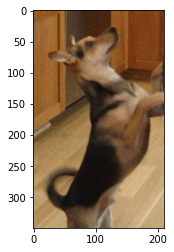

In [ ]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


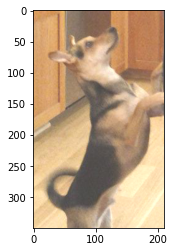

In [ ]:
import numpy as np
img_add = np.clip(img, a_min=0, a_max=1) + 0.25
plt.imshow(img_add)

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

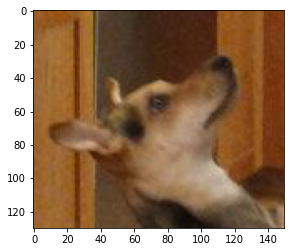

In [ ]:
img_cropped = img[0:130, 15:165]
img_cropped = img_cropped[:, :, :3] # discarding alpha colour channel
plt.imshow(img_cropped)

## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both 
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [ ]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [ ]:
img_torch = torch.from_numpy(img_cropped)

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [ ]:
img_torch.shape

torch.Size([130, 150, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [ ]:
print("floating-point numbers stored in tensor img_torch: ", 130*150*3)

floating-point numbers stored in tensor img_torch:  58500


### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [ ]:
print("shape after transpose: ", img_torch.transpose(0,2).shape)
print("shape before transpose: ",img_torch.shape)

print("- swap dimension 0 and dimension 2 of tensor img_torch")
print("- return a version of tensor img_torch that has its 0 and 2nd dimension swapped")
print("- no it's not, since the transposed version is not assigned to the original")

shape after transpose:  torch.Size([3, 150, 130])
shape before transpose:  torch.Size([130, 150, 3])
- swap dimension 0 and dimension 2 of tensor img_torch
- return a version of tensor img_torch that has its 0 and 2nd dimension swapped
- no it's not, since the transposed version is not assigned to the original


### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [ ]:
print("shape after unsqueeze: ", img_torch.unsqueeze(0).shape)
print("shape before unsqueeze: ",img_torch.shape)
print("- insert a dimension of size one at the input position i.e. 0")
print("- return a new tensor with dimension of size one inserted at the specified location")
print("- no it's not, since the unsqueezed version is not addigned to the original, the function just return a new tensor")

shape after unsqueeze:  torch.Size([1, 130, 150, 3])
shape before unsqueeze:  torch.Size([130, 150, 3])
- insert a dimension of size one at the input position i.e. 0
- return a new tensor with dimension of size one inserted at the specified location
- no it's not, since the unsqueezed version is not addigned to the original, the function just return a new tensor


### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [ ]:
#help(torch.max)
max_value = img_torch.max(0)[0].max(0)[0]
max_value

tensor([0.8941, 0.7882, 0.6745])

## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()

        num_of_hidden_units = 30
        self.layer1 = nn.Linear(28 * 28, num_of_hidden_units)
        self.layer2 = nn.Linear(num_of_hidden_units, 1)
        #self.layer2 = nn.Linear(num_of_hidden_units, 30)
        #self.layer3 = nn.Linear(30, 20)
        #self.layer4 = nn.Linear(20, 40)
        #self.layer5 = nn.Linear(40, 1)

    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        #activation1 = F.tanh(activation1)
        #activation1 = F.elu(activation1)
        #activation1 = F.celu(activation1)
        activation2 = self.layer2(activation1)
        #activation3 = self.layer3(activation2)
        #activation4 = self.layer4(activation3)
        #activation5 = self.layer5(activation4)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
learning_rate = 0.005
optimizer = optim.SGD(pigeon.parameters(), lr=learning_rate, momentum=0.9)

num_of_iterations = 1
for i in range(num_of_iterations):
  for (image, label) in mnist_train:
      # actual ground truth: is the digit less than 3?
      actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
      # pigeon prediction
      out = pigeon(img_to_tensor(image)) # step 1-2
      # update the parameters based on the loss
      loss = criterion(out, actual)      # step 3
      loss.backward()                    # step 4 (compute the updates for each parameter)
      optimizer.step()                   # step 4 (make the updates for each parameter)
      optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921


### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

In [ ]:
"""
--------------------------------------------------
number of training iterations  | Training Accuracy
           1                   |       0.964
           2                   |       0.984
           3                   |       0.986
           4                   |       0.99
           5                   |       0.989
           10                  |       0.999
           30                  |       1.0
--------------------------------------------------
number of hidden units         | Training Accuracy
           30                  |       0.964
           40                  |       0.969
           50                  |       0.967
           60                  |       0.969
           80                  |       0.969
           100                 |       0.97
           300                 |       0.977
--------------------------------------------------
number of layers               | Training Accuracy
           2                   |       0.964
           3                   |       0.961
           4                   |       0.96
           5                   |       0.957
--------------------------------------------------
types of activation function   | Training Accuracy
           relu                |       0.964
           elu                 |       0.956
           tanh                |       0.96
           celu                |       0.956
--------------------------------------------------
learning rate                  | Training Accuracy
           0.005               |       0.964
           0.01                |       0.961
           0.1                 |       0.688
           0.001               |       0.922
           0.0001              |       0.688
           0.004               |       0.967



The number of training iterations resulted in the best accuracy on training data.  
When number of training iterations is 30, the training accuracy is 1.0 
"""

### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

In [ ]:
"""
--------------------------------------------------
number of training iterations  | Testing Accuracy
           1                   |       0.921
           2                   |       0.943
           3                   |       0.931
           4                   |       0.929
           5                   |       0.9339
           10                  |       0.941
           30                  |       0.941
--------------------------------------------------
number of hidden units         | Testing Accuracy
           30                  |       0.921
           40                  |       0.926
           50                  |       0.926
           60                  |       0.92
           80                  |       0.924
           100                 |       0.923
           300                 |       0.929
--------------------------------------------------
number of layers               | Testing Accuracy
           2                   |       0.921
           3                   |       0.913
           4                   |       0.911
           5                   |       0.912
--------------------------------------------------
types of activation function   | Testing Accuracy
           relu                |       0.921
           elu                 |       0.902
           tanh                |       0.906
           celu                |       0.902
--------------------------------------------------
learning rate                  | Testing Accuracy
           0.005               |       0.921
           0.01                |       0.918
           0.1                 |       0.703
           0.001               |       0.877
           0.0001              |       0.703
           0.004               |       0.916

The number of training iterations resulted in the best accuracy on testing data.
What accuracy were you able to achieve    
When number of training iterations is 2, the training accuracy is 0.943
"""

### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?

In [ ]:
"""
I would use the number of iterations and the number of hidden units 
to improve both the training and testing accuracy.
"""